In [1]:
pip install imblearn

In [2]:
pip install NLTK

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Meena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Meena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Meena\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
data = pd.read_csv('tourist_accommodation_reviews.csv', encoding = 'Windows-1252')

In [5]:
data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [6]:
data.shape

(53644, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [8]:
print('\n All Data Labels')
print(data.groupby('Location').count())


 All Data Labels
                      ID  Review Date  Hotel/Restaurant name  Review
Location                                                            
 Bang Tao Beach      600          600                    600     600
 Cape Panwa         1500         1500                   1500    1500
 Chalong            1287         1287                   1287    1287
 Choeng Thale       3378         3378                   3378    3378
 Kamala             3162         3162                   3162    3162
 Karon              5826         5826                   5826    5826
 Karon Beach         397          397                    397     397
 Kata Beach         5752         5752                   5752    5752
 Kata Noi Beach      200          200                    200     200
 Kathu              1078         1078                   1078    1078
 Koh Kaew            293          293                    293     293
 Mai Khao           2372         2372                   2372    2372
 Nai Harn       

In [9]:
data

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [10]:
print(data.nunique())

ID                       49944
Review Date               2344
Location                    25
Hotel/Restaurant name      537
Review                   49938
dtype: int64


In [11]:
data_patong = data[data["Location"].str.strip()=="Patong"]

In [12]:
data_patong

,ID,Review Date,Location,Hotel/Restaurant name,Review
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [13]:
print(data_patong['Hotel/Restaurant name'].nunique())

164


In [14]:
print(data_patong['Hotel/Restaurant name'].unique())

["Sam's Steaks and Grill" 'Highway Curry Indian & Thai Cuisine'
 'Ao Chalong Yacht Club Restaurant' "Naughty Nuri's Phuket"
 'Natural Efe Macrobiotic World' 'Sizzle Rooftop Restaurant'
 'Climax on Bangla' 'Le Brooklyn Patong' 'La Dolce Vita Restaurant'
 'i-Kroon Cafe' 'Salute Italian Restaurant' 'Rustic - Eatery & Bar'
 'Austrian Garden Restaurant' 'Trattoria Capri da Rico' 'Vista'
 'The Blue Mango Bar and Grill' 'La Gritta'
 'Sandwich Shoppe Cafe & Bar Patong Phuket' 'Halfway Inn (Restaurant)'
 'ICC Indian Curry Club' "Rosco's Restaurant & Sports Bar"
 'BYD Lofts Restaurant Bistro & Bar' 'Home Dining Cafe & Lounge'
 'Soul Curry Restaurant and Bar' 'Kantok Restaurant at Burasari Resort'
 'Poo Nurntong Restaurant' 'EuroThai Restaurant' 'No 9 2nd Restaurant'
 'Pizzeria Da Moreno' 'YamThai Restaurant' 'Golbasi' 'Two Chefs Patong'
 'Thai Smile 2' 'Restaurant Break Point' 'Madras Cafe 2 & Guest House'
 'K-Hotel Restaurant and Beer Garden' 'Acqua Restaurant'
 'Arabia Restaurant' 'ELLA Bar & 

In [15]:
patong_restaurant = data_patong[data_patong['Hotel/Restaurant name'].isin(['Ali Baba Restaurant','East Restaurant','Indian Delight Restaurant',
                                                                                  'Cafe 101 Bar & Restaurant','Royal India Restaurant Patong','Baluchi Restaurant',
                                                                                  'Food Market Restaurant','The Orchids Restaurant','Savoey Restaurant','Pan Yaah Thai Restaurant',
                                                                           'Sea Hag Restaurant','Bubbles Restaurant','Lemongrass Restaurant','Sala Bua Restaurant','Badsha Indian Food',
                                                                           'Eurasian Restaurant','Pum Thai Restaurant','No 9 Restaurant','Yo Green Restaurant','No.6 Restaurant',
                                                                          'Sabai Beach Restaurant','Patong Corner Restaurant','The Sweet Restaurant','Restaurant Georgia','Arabia Restaurant',
                                                                          'Restaurant Break Point','YamThai Restaurant','EuroThai Restaurant','Salute Italian Restaurant','Poo Nurntong Restaurant'
                                                                                                                                                                                                                   
                                                                          ])]

In [16]:
patong_restaurant

,ID,Review Date,Location,Hotel/Restaurant name,Review
3669,rn580711076,Reviewed 4 days ago,Patong,Salute Italian Restaurant,The most consistent Italian eatery in Patong; ...
3670,rn580515608,Reviewed 5 days ago,Patong,Salute Italian Restaurant,A great place to enjoy authentic Italian Pizza...
3671,rn578974185,Reviewed 1 week ago,Patong,Salute Italian Restaurant,A nice little restaurant in a little alley off...
3672,rn578780767,Reviewed 1 week ago,Patong,Salute Italian Restaurant,Service was excellent & the food was so good w...
3673,rn578421523,Reviewed 2 weeks ago,Patong,Salute Italian Restaurant,Fantastic restaurant - food and service a stan...
...,...,...,...,...,...
53542,rn135620088,"Reviewed July 28, 2012",Patong,Ali Baba Restaurant,Words cannot begin in to describe how bad this...
53543,rn133411027,"Reviewed July 3, 2012",Patong,Ali Baba Restaurant,Had Ali Baba last nite. The chicken tikka was ...
53544,rn132876348,"Reviewed June 27, 2012",Patong,Ali Baba Restaurant,"what should have been a great meal, according ..."
53545,rn132871643,"Reviewed June 27, 2012",Patong,Ali Baba Restaurant,Rude owner who obviously wanted to take your m...


In [17]:
print(patong_restaurant['Hotel/Restaurant name'].nunique())

30


In [18]:
patong_restaurant.shape

(3084, 5)

In [19]:
print(patong_restaurant.nunique())

ID                       2984
Review Date              1099
Location                    1
Hotel/Restaurant name      30
Review                   2984
dtype: int64


In [20]:
patong_restaurant.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3084,3084,3084,3084,3084
unique,2984,1099,1,30,2984
top,rn494484420,Reviewed 1 week ago,Patong,No.6 Restaurant,There are so many places to eat in Kata and Ka...
freq,5,41,3084,200,5


In [21]:
sentiment = SentimentIntensityAnalyzer()

patong_restaurant['compound'] = [sentiment.polarity_scores(review)['compound'] for review in patong_restaurant['Review']]
patong_restaurant['neg'] = [sentiment.polarity_scores(review)['neg'] for review in patong_restaurant['Review']]
patong_restaurant['neu'] = [sentiment.polarity_scores(review)['neu'] for review in patong_restaurant['Review']]
patong_restaurant['pos'] = [sentiment.polarity_scores(review)['pos'] for review in patong_restaurant['Review']]

C:\Users\Meena\AppData\Local\Temp\ipykernel_23760\2070616315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patong_restaurant['compound'] = [sentiment.polarity_scores(review)['compound'] for review in patong_restaurant['Review']]
C:\Users\Meena\AppData\Local\Temp\ipykernel_23760\2070616315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patong_restaurant['neg'] = [sentiment.polarity_scores(review)['neg'] for review in patong_restaurant['Review']]
C:\Users\Meena\AppData\Local\Temp\ipykernel_23760\20

In [22]:
patong_restaurant.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
3669,rn580711076,Reviewed 4 days ago,Patong,Salute Italian Restaurant,The most consistent Italian eatery in Patong; ...,0.9652,0.0,0.533,0.467
3670,rn580515608,Reviewed 5 days ago,Patong,Salute Italian Restaurant,A great place to enjoy authentic Italian Pizza...,0.9869,0.0,0.495,0.505
3671,rn578974185,Reviewed 1 week ago,Patong,Salute Italian Restaurant,A nice little restaurant in a little alley off...,0.8674,0.0,0.650,0.350
3672,rn578780767,Reviewed 1 week ago,Patong,Salute Italian Restaurant,Service was excellent & the food was so good w...,0.9160,0.0,0.669,0.331
3673,rn578421523,Reviewed 2 weeks ago,Patong,Salute Italian Restaurant,Fantastic restaurant - food and service a stan...,0.9272,0.0,0.612,0.388


In [23]:
patong_restaurant[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3084.000000,3084.000000,3084.000000,3084.000000
mean,0.635670,0.027693,0.742780,0.229521
std,0.438219,0.051459,0.129136,0.138322
min,-0.964200,0.000000,0.248000,0.000000
25%,0.541250,0.000000,0.660000,0.126000
50%,0.827100,0.000000,0.747000,0.223000
75%,0.920025,0.045000,0.835000,0.320000
max,0.993000,0.405000,1.000000,0.752000


<AxesSubplot:xlabel='compound', ylabel='Count'>

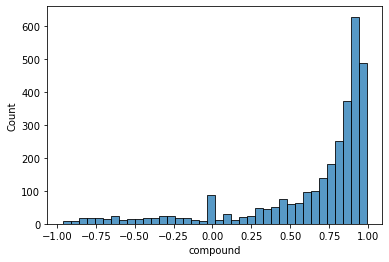

In [24]:
sns.histplot(patong_restaurant['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

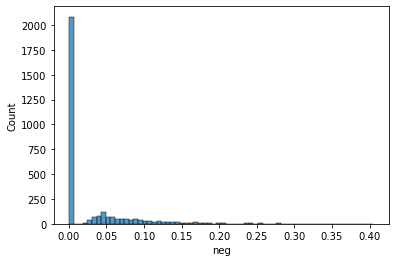

In [25]:
sns.histplot(patong_restaurant['neg'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

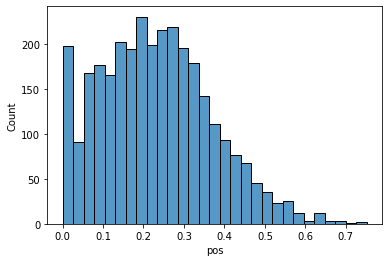

In [26]:
sns.histplot(patong_restaurant['pos'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

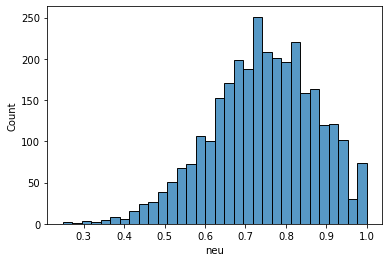

In [27]:
sns.histplot(patong_restaurant['neu'])

## Positive reviews

In [28]:
(patong_restaurant['compound']>=0).groupby(patong_restaurant['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Ali Baba Restaurant               68
Arabia Restaurant                 95
Badsha Indian Food                79
Baluchi Restaurant                92
Bubbles Restaurant                93
Cafe 101 Bar & Restaurant         86
East Restaurant                   91
Eurasian Restaurant               89
EuroThai Restaurant               88
Food Market Restaurant            71
Indian Delight Restaurant         91
Lemongrass Restaurant             92
No 9 Restaurant                   91
No.6 Restaurant                  186
Pan Yaah Thai Restaurant          95
Patong Corner Restaurant          95
Poo Nurntong Restaurant           95
Pum Thai Restaurant               95
Restaurant Break Point            92
Restaurant Georgia                84
Royal India Restaurant Patong     88
Sabai Beach Restaurant            93
Sala Bua Restaurant               96
Salute Italian Restaurant         98
Savoey Restaurant                 79
Sea Hag Restaurant                88
The Orchids Rest

In [29]:
percent_positive = pd.DataFrame((patong_restaurant['compound']>=0).groupby(patong_restaurant['Hotel/Restaurant name']).sum()
                                /patong_restaurant['Hotel/Restaurant name'].groupby(patong_restaurant['Hotel/Restaurant name']).count()*100,
                                columns=['% positive reviews']).sort_values(by='% positive reviews')

percent_positive

,% positive reviews
Hotel/Restaurant name,
Ali Baba Restaurant,68.000000
Food Market Restaurant,71.717172
Badsha Indian Food,79.000000
Savoey Restaurant,79.000000
Cafe 101 Bar & Restaurant,86.000000
Sea Hag Restaurant,88.000000
Royal India Restaurant Patong,88.000000
EuroThai Restaurant,88.000000
Yo Green Restaurant,89.000000


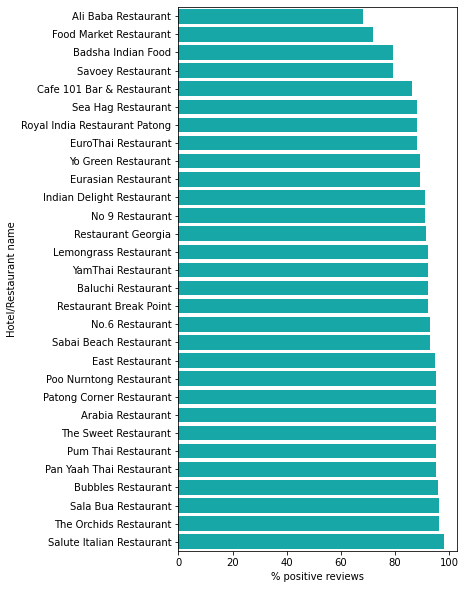

In [30]:
sns.barplot(data=percent_positive, x='% positive reviews', y=percent_positive.index, color='c')
plt.gcf().set_size_inches(5,10)

## Negative Reviews

In [31]:
(patong_restaurant['compound']<=0).groupby(patong_restaurant['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Ali Baba Restaurant              37
Arabia Restaurant                 7
Badsha Indian Food               23
Baluchi Restaurant               11
Bubbles Restaurant                4
Cafe 101 Bar & Restaurant        17
East Restaurant                   9
Eurasian Restaurant              15
EuroThai Restaurant              13
Food Market Restaurant           34
Indian Delight Restaurant        12
Lemongrass Restaurant            12
No 9 Restaurant                   9
No.6 Restaurant                  18
Pan Yaah Thai Restaurant          9
Patong Corner Restaurant          6
Poo Nurntong Restaurant           6
Pum Thai Restaurant               6
Restaurant Break Point           11
Restaurant Georgia               15
Royal India Restaurant Patong    14
Sabai Beach Restaurant           10
Sala Bua Restaurant               6
Salute Italian Restaurant         4
Savoey Restaurant                22
Sea Hag Restaurant               17
The Orchids Restaurant            7
The Sw

In [32]:
percent_negative = pd.DataFrame((patong_restaurant['compound']<=0).groupby(patong_restaurant['Hotel/Restaurant name']).sum()
                                /patong_restaurant['Hotel/Restaurant name'].groupby(patong_restaurant['Hotel/Restaurant name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant name,
Salute Italian Restaurant,4.000000
Bubbles Restaurant,4.123711
The Sweet Restaurant,6.000000
Sala Bua Restaurant,6.000000
Pum Thai Restaurant,6.000000
Poo Nurntong Restaurant,6.000000
Patong Corner Restaurant,6.000000
Arabia Restaurant,7.000000
The Orchids Restaurant,7.000000


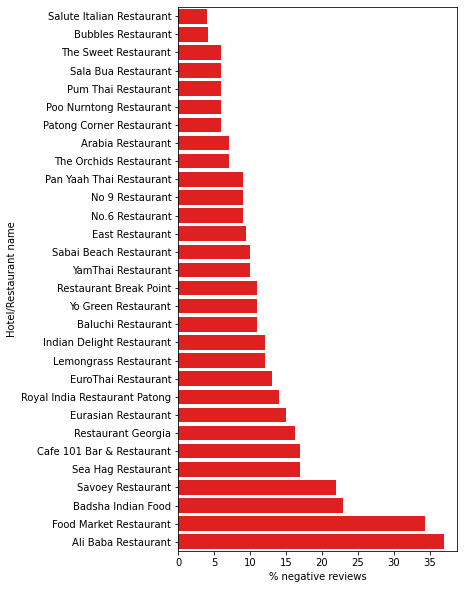

In [33]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='r')
plt.gcf().set_size_inches(5,10)

## Wordcloud

In [34]:
stop_words = nltk.corpus.stopwords.words('english')

In [35]:
#text mining bag of words model stemmed function
def preprocess_stem_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)  #Tokenization
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Stopwords removal
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]   #Stemming
    return stemmed_text

In [36]:
#applying the bag of words model stemmed_function on salute italian restaurant
patong_restaurant['processed_review'] = patong_restaurant['Review'].apply(preprocess_stem_text)

res_positive_review = patong_restaurant.loc[(patong_restaurant['Hotel/Restaurant name']=='Salute Italian Restaurant') & (patong_restaurant['compound']>0),:]

res_negative_review = patong_restaurant.loc[(patong_restaurant['Hotel/Restaurant name']=='Salute Italian Restaurant') & (patong_restaurant['compound']<0),:]


C:\Users\Meena\AppData\Local\Temp\ipykernel_23760\239196144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patong_restaurant['processed_review'] = patong_restaurant['Review'].apply(preprocess_stem_text)


In [37]:
res_negative_review.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
3728,rn542245453,"Reviewed November 20, 2017",Patong,Salute Italian Restaurant,Very very pure main course! Very big plates an...,-0.6741,0.119,0.857,0.024,"[pure, main, cours, big, plate, small, everyth..."
3754,rn513056173,"Reviewed August 15, 2017",Patong,Salute Italian Restaurant,If you are craving for Italian carbs whilst in...,-0.1531,0.040,0.960,0.000,"[crave, italian, carb, whilst, phuket, look, t..."


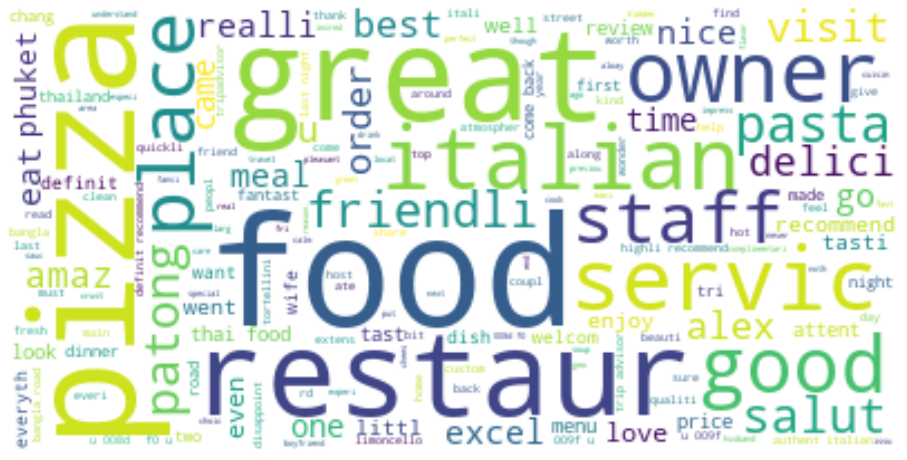

In [38]:
#positive words for salute italian
pos_tokens = [word for review in res_positive_review['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))


plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

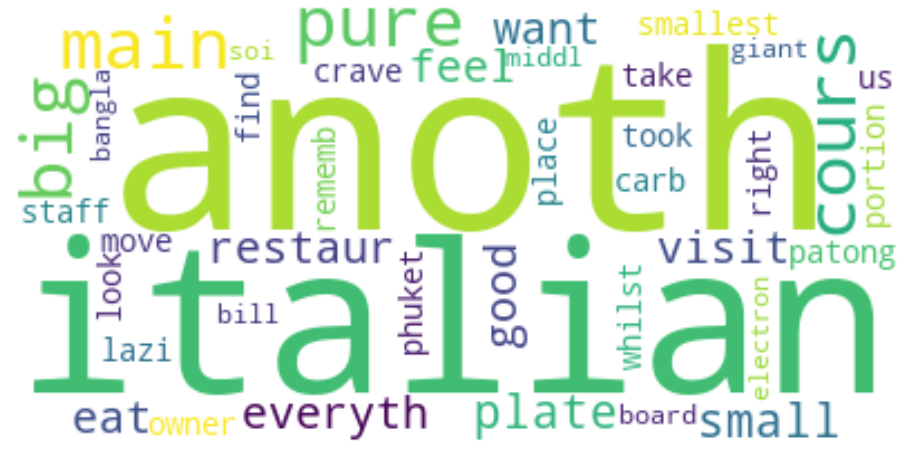

In [39]:
#negative words for salute italian 
neg_tokens = [word for review in res_negative_review['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))


plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
#selecting the restaurant with the highest negative review 
Ali_negative_review = patong_restaurant.loc[(patong_restaurant['Hotel/Restaurant name']=='Ali Baba Restaurant') & (patong_restaurant['compound']<0),:]

In [41]:
Ali_negative_review.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
53449,rn567825659,"Reviewed March 21, 2018",Patong,Ali Baba Restaurant,Bought the noodle and king prawn curry. Guess ...,-0.6633,0.127,0.840,0.034,"[bought, noodl, king, prawn, curri, guess, cos..."
53450,rn563144920,"Reviewed February 27, 2018",Patong,Ali Baba Restaurant,I thought I would never say this but being a P...,-0.1901,0.099,0.818,0.083,"[thought, would, never, say, pakistani, know, ..."
53451,rn511236955,"Reviewed August 11, 2017",Patong,Ali Baba Restaurant,Guys this restaurant food is like hell never h...,-0.0357,0.233,0.504,0.264,"[guy, restaur, food, like, hell, never, wast, ..."
53453,rn509276644,"Reviewed August 6, 2017",Patong,Ali Baba Restaurant,"First day we got really good but pricey food, ...",-0.7937,0.253,0.682,0.065,"[first, day, got, realli, good, pricey, food, ..."
53460,rn465497303,"Reviewed March 8, 2017",Patong,Ali Baba Restaurant,The food served here is less than half the qua...,-0.6124,0.111,0.889,0.000,"[food, serv, less, half, quantiti, serv, mani,..."


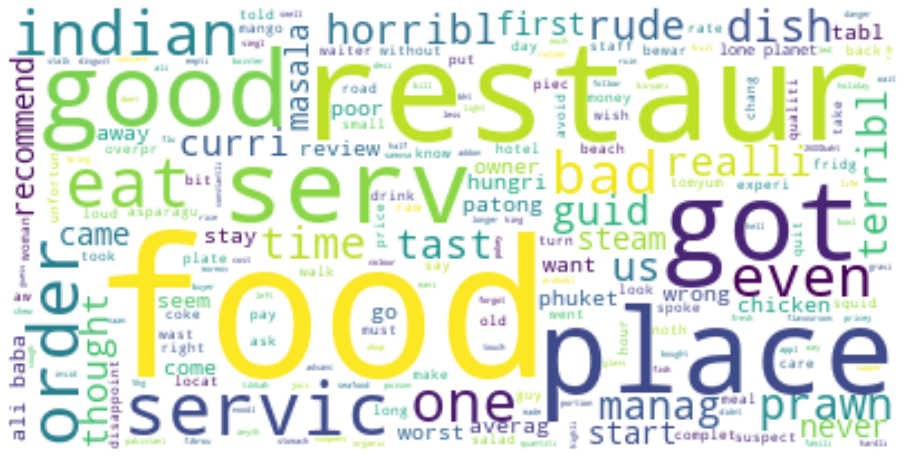

In [42]:
#negative words for Ali Baba
Ali_neg_tokens = [word for review in Ali_negative_review['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(Ali_neg_tokens))


plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Testing Lemma

In [43]:
def preprocess_lemma_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    lemmatized_text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens]
    return lemmatized_text

In [44]:
data_patong

,ID,Review Date,Location,Hotel/Restaurant name,Review
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [45]:
data_patong['compound'] = [sentiment.polarity_scores(review)['compound'] for review in data_patong['Review']]

C:\Users\Meena\AppData\Local\Temp\ipykernel_23760\2785201134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patong['compound'] = [sentiment.polarity_scores(review)['compound'] for review in data_patong['Review']]


In [46]:
#applying lemma bag of words function
data_patong['processed_review'] = data_patong['Review'].apply(preprocess_lemma_text)

C:\Users\Meena\AppData\Local\Temp\ipykernel_23760\3764807524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patong['processed_review'] = data_patong['Review'].apply(preprocess_lemma_text)


In [47]:
#selecting salute italian restaurant
res_positive_review_l = data_patong.loc[(patong_restaurant['Hotel/Restaurant name']=='Salute Italian Restaurant') & (data_patong['compound']>0),:]

res_negative_review_l = data_patong.loc[(patong_restaurant['Hotel/Restaurant name']=='Salute Italian Restaurant') & (data_patong['compound']<0),:]

In [48]:
res_negative_review_l.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,processed_review
3728,rn542245453,"Reviewed November 20, 2017",Patong,Salute Italian Restaurant,Very very pure main course! Very big plates an...,-0.6741,"[pure, main, course, big, plate, small, everyt..."
3754,rn513056173,"Reviewed August 15, 2017",Patong,Salute Italian Restaurant,If you are craving for Italian carbs whilst in...,-0.1531,"[craving, italian, carbs, whilst, phuket, look..."


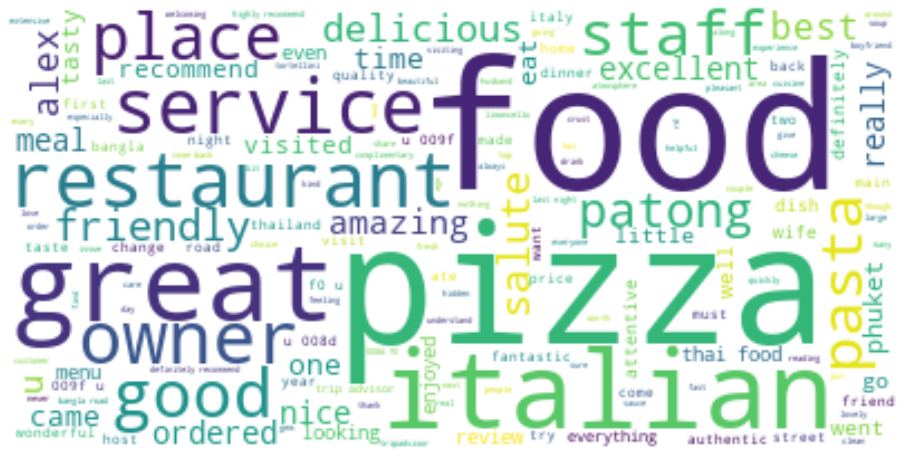

In [49]:
#positive lemmatized review wordcloud for salute italian restaurant

pos_tokens_l = [word for review in res_positive_review_l['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens_l))


plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
#selecting ali baba restaurant
Ali_negative_review_l = data_patong.loc[(patong_restaurant['Hotel/Restaurant name']=='Ali Baba Restaurant') & (data_patong['compound']<0),:]

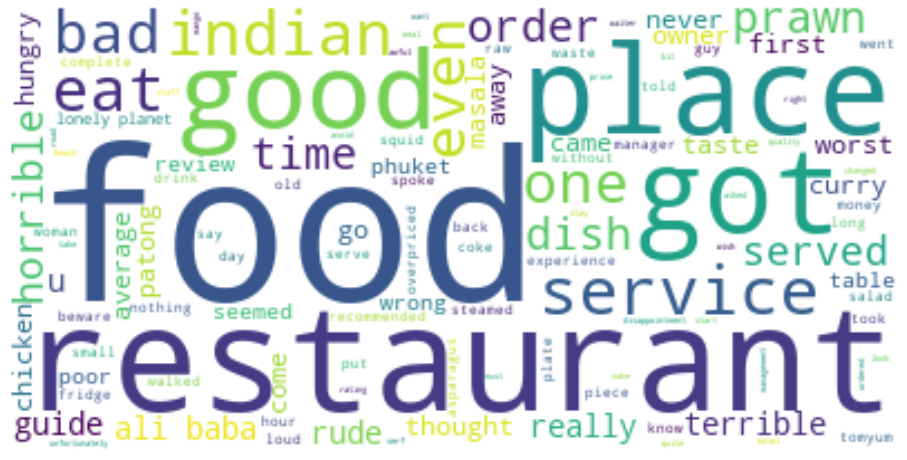

In [51]:
#negative words for Ali Baba
Ali_neg_tokens_l = [word for review in Ali_negative_review_l['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(Ali_neg_tokens_l))

plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Frequency Distributions

In [52]:
#positive lemmatized FreqDist for Salute Italian 

from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens_l)
pos_freqdist.tabulate(5)

      food      pizza    italian      great restaurant 
        69         54         40         40         36 


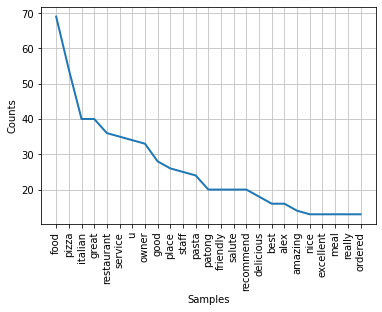

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
pos_freqdist.plot(25)

In [54]:
#negative lemmatized FreqDist for Ali Baba
neg_freqdist = FreqDist(Ali_neg_tokens_l)
neg_freqdist.tabulate(5)

      food restaurant      place        got       good 
        31         14         10          9          8 


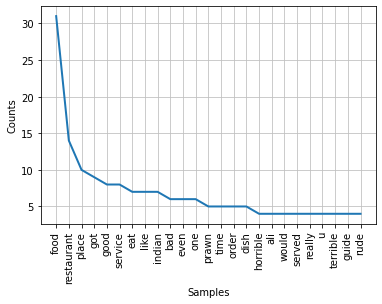

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
neg_freqdist.plot(25)